In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
sample_submission_file = '/kaggle/input/nlp-getting-started/sample_submission.csv'
train_file = '/kaggle/input/nlp-getting-started/train.csv'
test_file = '/kaggle/input/nlp-getting-started/test.csv'

#df_sample_submission = pd.read_csv(sample_submission_file)
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [3]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=False)

def get_avg_token_length(tokens):
    if len(tokens) == 0:
        return 0
    total_chars = sum(len(token) for token in tokens)
    return total_chars / len(tokens)

def process_data(df):
    df_out = df.copy()

    df_out["text"] = df_out["text"].str.strip()
    df_out['keyword_is_null'] = df_out['keyword'].isnull().astype(int)
    df_out['keyword'] = df_out['keyword'].fillna('no_keyword').str.replace('%20', ' ', regex=False).str.lower().str.strip()
    df_out['location'] = df_out['location'].fillna('no_location').str.strip()
    df_out['has_location_info'] = df_out['location'].apply(lambda x: 0 if x == 'no_location' else 1)
    df_out['tokens'] = df_out['text'].apply(tk.tokenize)
    df_out['text_length'] = df_out['text'].apply(len)
    df_out['word_count'] = df_out['tokens'].apply(len)
    df_out['avg_word_length'] = df_out['tokens'].apply(get_avg_token_length)
    df_out['has_url'] = df_out['text'].str.contains('http', regex=False).astype(int)
    df_out['has_hashtag'] = df_out['text'].str.contains('#', regex=False).astype(int)
    df_out['has_mention'] = df_out['text'].str.contains('@', regex=False).astype(int)
    df_out['hashtag_count'] = df_out['text'].apply(lambda x: x.count('#'))
    df_out['special_chars_count'] = df_out['text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
    avg_special_chars = df_out['special_chars_count'].mean()
    df_out['many_special_chars'] = df_out['special_chars_count'] > avg_special_chars

    return df_out

df_train = process_data(df_train)
df_test = process_data(df_test)


In [7]:
df_train.describe()

,id,target,keyword_is_null,has_location_info,text_length,word_count,avg_word_length,has_url,has_hashtag,has_mention,hashtag_count,special_chars_count
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,0.008013,0.667280,101.036911,16.884540,5.412408,0.521608,0.231315,0.267831,0.446999,6.848549
std,3137.116090,0.49506,0.089160,0.471218,33.781796,6.652349,1.546070,0.499566,0.421701,0.442858,1.099841,4.636616
min,1.000000,0.00000,0.000000,0.000000,7.000000,1.000000,1.714286,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2734.000000,0.00000,0.000000,0.000000,78.000000,12.000000,4.300000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5408.000000,0.00000,0.000000,1.000000,107.000000,17.000000,5.176471,1.000000,0.000000,0.000000,0.000000,6.000000
75%,8146.000000,1.00000,0.000000,1.000000,133.000000,22.000000,6.250000,1.000000,0.000000,1.000000,0.000000,10.000000
max,10873.000000,1.00000,1.000000,1.000000,157.000000,53.000000,16.500000,1.000000,1.000000,1.000000,13.000000,57.000000


In [8]:
#df_sample_submission.head()

In [9]:
df_train.head()

,id,keyword,location,text,target,keyword_is_null,has_location_info,tokens,text_length,word_count,avg_word_length,has_url,has_hashtag,has_mention,hashtag_count,special_chars_count,many_special_chars
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,1,0,"[our, deeds, are, the, reason, of, this, #eart...",69,13,4.384615,0,1,0,1,1,False
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,1,0,"[forest, fire, near, la, ronge, sask, ., canada]",38,8,4.000000,0,0,0,0,1,False
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,1,0,"[all, residents, asked, to, ', shelter, in, pl...",133,25,4.480000,0,0,0,0,3,False
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,1,0,"[13,000, people, receive, #wildfires, evacuati...",64,8,7.125000,0,1,0,1,2,False
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,1,0,"[just, got, sent, this, photo, from, ruby, #al...",87,16,4.500000,0,1,0,2,2,False


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7613 non-null   int64  
 1   keyword              7613 non-null   object 
 2   location             7613 non-null   object 
 3   text                 7613 non-null   object 
 4   target               7613 non-null   int64  
 5   keyword_is_null      7613 non-null   int64  
 6   has_location_info    7613 non-null   int64  
 7   tokens               7613 non-null   object 
 8   text_length          7613 non-null   int64  
 9   word_count           7613 non-null   int64  
 10  avg_word_length      7613 non-null   float64
 11  has_url              7613 non-null   int64  
 12  has_hashtag          7613 non-null   int64  
 13  has_mention          7613 non-null   int64  
 14  hashtag_count        7613 non-null   int64  
 15  special_chars_count  7613 non-null   i

In [11]:
df_test.head()

,id,keyword,location,text,keyword_is_null,has_location_info,tokens,text_length,word_count,avg_word_length,has_url,has_hashtag,has_mention,hashtag_count,special_chars_count,many_special_chars
0,0,no_keyword,no_location,Just happened a terrible car crash,1,0,"[just, happened, a, terrible, car, crash]",34,6,4.833333,0,0,0,0,0,False
1,2,no_keyword,no_location,"Heard about #earthquake is different cities, s...",1,0,"[heard, about, #earthquake, is, different, cit...",64,11,5.090909,0,1,0,1,3,False
2,3,no_keyword,no_location,"there is a forest fire at spot pond, geese are...",1,0,"[there, is, a, forest, fire, at, spot, pond, ,...",96,21,3.714286,0,0,0,0,2,False
3,9,no_keyword,no_location,Apocalypse lighting. #Spokane #wildfires,1,0,"[apocalypse, lighting, ., #spokane, #wildfires]",40,5,7.400000,0,1,0,2,3,False
4,11,no_keyword,no_location,Typhoon Soudelor kills 28 in China and Taiwan,1,0,"[typhoon, soudelor, kills, 28, in, china, and,...",45,8,4.750000,0,0,0,0,0,False


In [12]:
df_train['location'].unique()

array(['no_location', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       '#NewcastleuponTyne #UK', 'Vancouver, Canada', 'Lincoln'],
      dtype=object)

In [13]:
df_train['target'].value_counts()

,count
target,
0,4342
1,3271


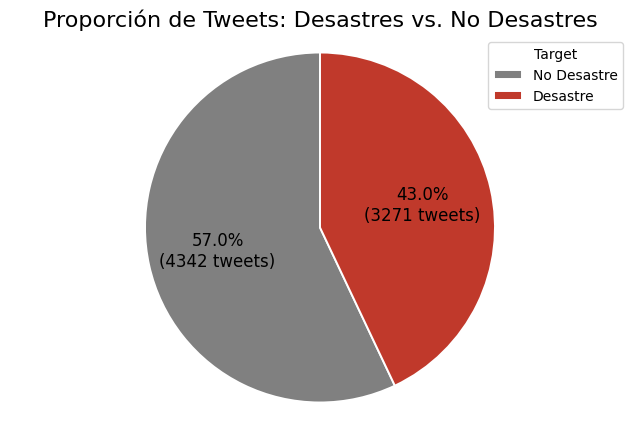

In [14]:
# Not a Disaster -> 0
# Disaster -> 1

counts = df_train['target'].value_counts()
NOT_A_DISASTER_COLOR = '#808080'
DISASTER_COLOR = '#C0392B'
COLORS = [NOT_A_DISASTER_COLOR, DISASTER_COLOR]
LEGEND_LABELS = ['No Desastre', 'Desastre']

total_tweets = counts.sum()

def format_auto_pct(pct):
    number_of_tweets = int(round(pct/100 * total_tweets))
    return f'{pct:.1f}%\n({number_of_tweets} tweets)'

plt.figure(figsize=(8,5))
plt.pie(
    counts,
    colors=COLORS,
    autopct=format_auto_pct,
    startangle=90,
    textprops={'fontsize': 12},
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 1.4
    }
)


plt.title('Proporción de Tweets: Desastres vs. No Desastres', fontsize=16)
plt.axis('equal')
plt.legend(
    labels=LEGEND_LABELS,
    title="Target",
)

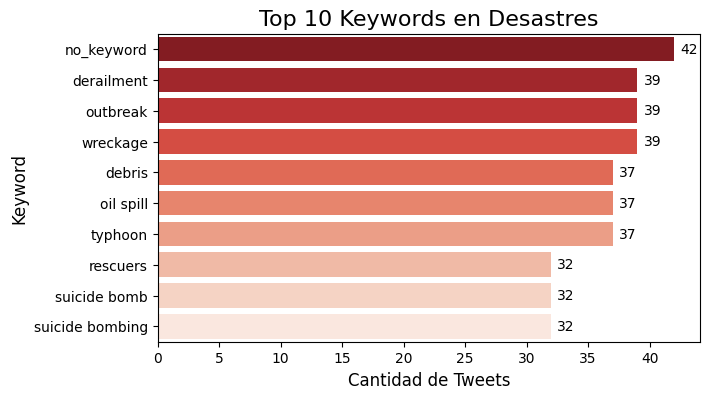

In [15]:
# Buscamos las palabras claves que más aparecen en en
df_real_disasters = df_train[df_train['target'] == 1]
top_10_reals_keywords = df_real_disasters['keyword'].value_counts().head(10)
top_10_reals_keywords

# Grafico de las keywords más usadas en Desastres
plt.figure(figsize=(7,4))

ax = sns.barplot(
    x=top_10_reals_keywords.values,
    y=top_10_reals_keywords.index,
    palette='Reds_r',
    hue = top_10_reals_keywords.index,
    legend=False
)

plt.title('Top 10 Keywords en Desastres', fontsize=16)
plt.xlabel('Cantidad de Tweets', fontsize=12)
plt.ylabel('Keyword', fontsize=12)

for i, v in enumerate(top_10_reals_keywords.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.show()



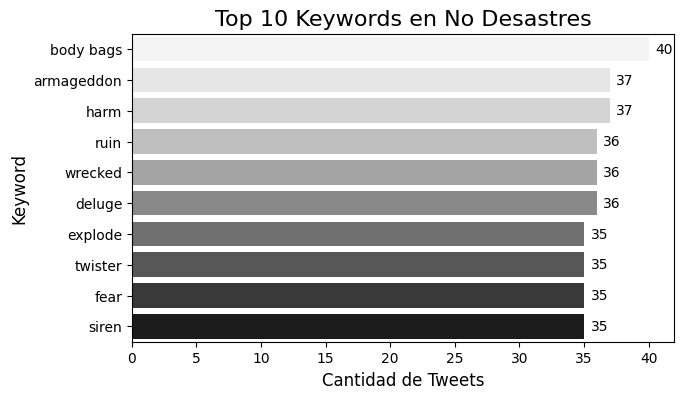

In [16]:
# Buscamos las palabras claves que más aparecen en desastres falsos
df_fake_desastres = df_train[df_train['target'] == 0]
top_10_false_keywords = df_fake_desastres['keyword'].value_counts().head(10)
top_10_false_keywords

# Grafico de las keywords más usadas en No Desastres
plt.figure(figsize=(7,4))

ax = sns.barplot(
    x=top_10_false_keywords.values,
    y=top_10_false_keywords.index,
    palette='Greys',
    hue = top_10_false_keywords.index,
    legend=False
)

plt.title('Top 10 Keywords en No Desastres', fontsize=16)
plt.xlabel('Cantidad de Tweets', fontsize=12)
plt.ylabel('Keyword', fontsize=12)

for i, v in enumerate(top_10_false_keywords.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.show()

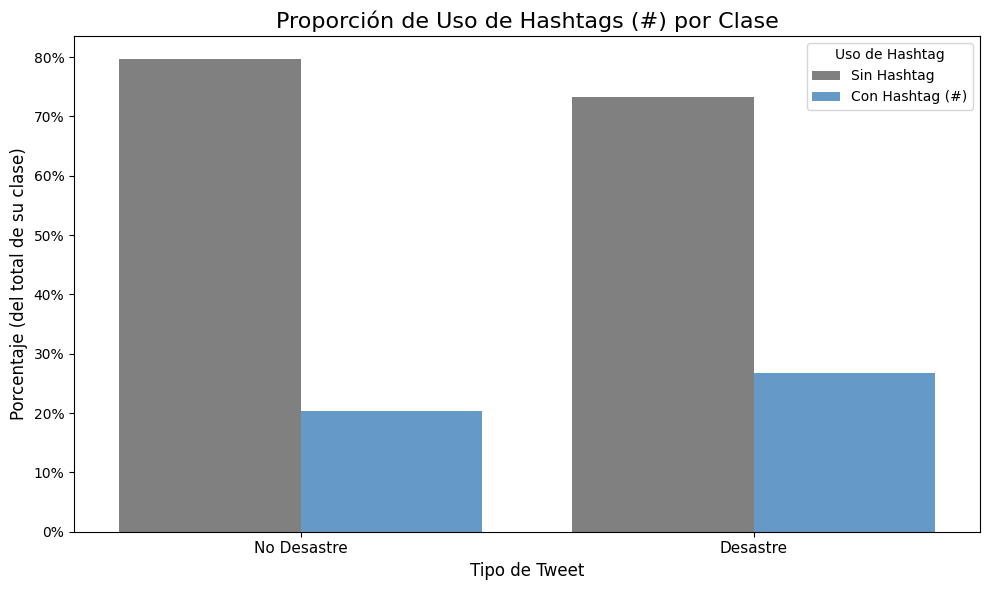

In [17]:
# @title Proporción de Uso de Hashtags (#) por Clase


df_agg = df_train.groupby('target')['has_hashtag'].value_counts(normalize=True).rename('percentage').reset_index()

# CORRECCIÓN: Usamos 1 y 0 en lugar de True y False
df_agg['has_hashtag'] = df_agg['has_hashtag'].map({1: 'Con Hashtag (#)', 0: 'Sin Hashtag'})

# Graficamos
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_agg,
    x='target',
    y='percentage',
    hue='has_hashtag',
    palette=['#808080', '#569CD6']
)

plt.title('Proporción de Uso de Hashtags (#) por Clase', fontsize=16)
plt.xlabel('Tipo de Tweet', fontsize=12)
plt.ylabel('Porcentaje (del total de su clase)', fontsize=12)
plt.xticks([0, 1], LEGEND_LABELS, fontsize=11)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Renombrar leyenda
ax.legend(title='Uso de Hashtag')

plt.tight_layout()
plt.show()

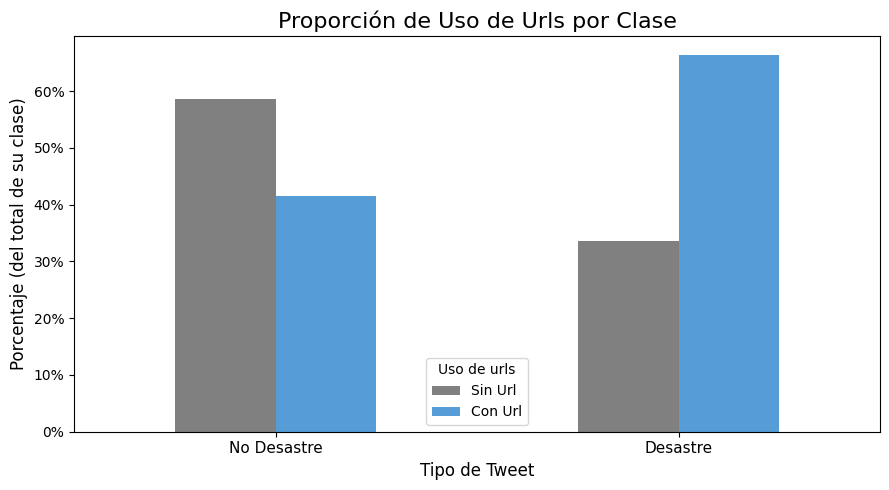

In [18]:
# @title Proporción de Uso de Urls por Clase

hashtag_count = df_train.groupby('target')['has_url'].value_counts()

total_per_target = df_train['target'].value_counts().sort_index()

df_pct = hashtag_count.unstack().div(total_per_target, axis=0)

df_plot = df_pct.rename(columns={True: 'Con Url', False: 'Sin Url'})

ax = df_plot.plot(
    kind='bar',
    #stacked=True,
    figsize=(9, 5),
    color=['#808080', '#569CD6']
)

plt.title('Proporción de Uso de Urls por Clase', fontsize=16)
plt.xlabel('Tipo de Tweet', fontsize=12)
plt.ylabel('Porcentaje (del total de su clase)', fontsize=12)
plt.xticks([0, 1], LEGEND_LABELS, fontsize=11, rotation=0)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(title='Uso de urls')

plt.tight_layout()
plt.show()

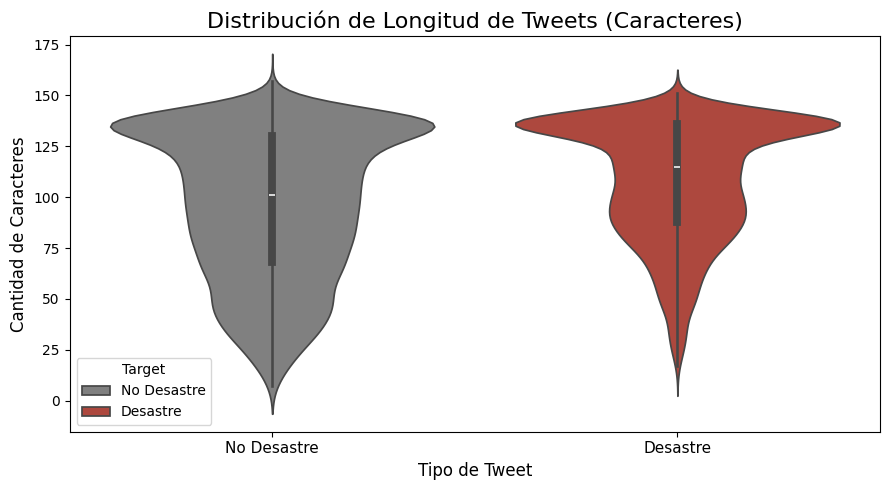

In [19]:

plt.figure(figsize=(9, 5))

ax = sns.violinplot(
    data=df_train,
    x="target",
    y="text_length",
    hue="target",
    palette=COLORS
)

plt.title("Distribución de Longitud de Tweets (Caracteres)", fontsize=16)
plt.xlabel("Tipo de Tweet", fontsize=12)
plt.ylabel("Cantidad de Caracteres", fontsize=12)

plt.xticks([0, 1], LEGEND_LABELS, fontsize=11)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, LEGEND_LABELS, title='Target')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3927825274.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


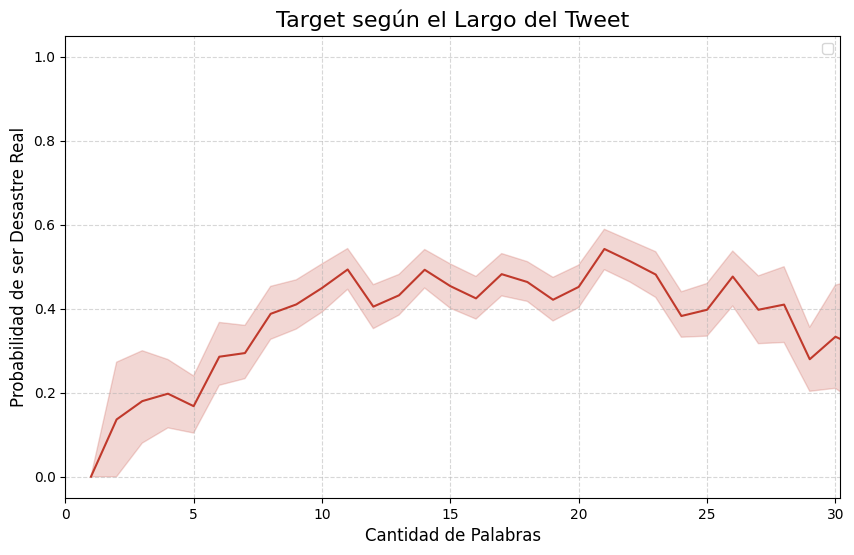

In [24]:
# @title Target segun la cantidad de palabras del tweet

plt.figure(figsize=(10, 6))

media = df_train['word_count'].mean()
desvio = df_train['word_count'].std()

limite_x = media + (2 * desvio)

sns.lineplot(data=df_train, x='word_count', y='target', color='#C0392B')

plt.title('Target según el Largo del Tweet', fontsize=16)
plt.xlabel('Cantidad de Palabras', fontsize=12)
plt.ylabel('Probabilidad de ser Desastre Real', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.xlim(0, limite_x)

plt.show()

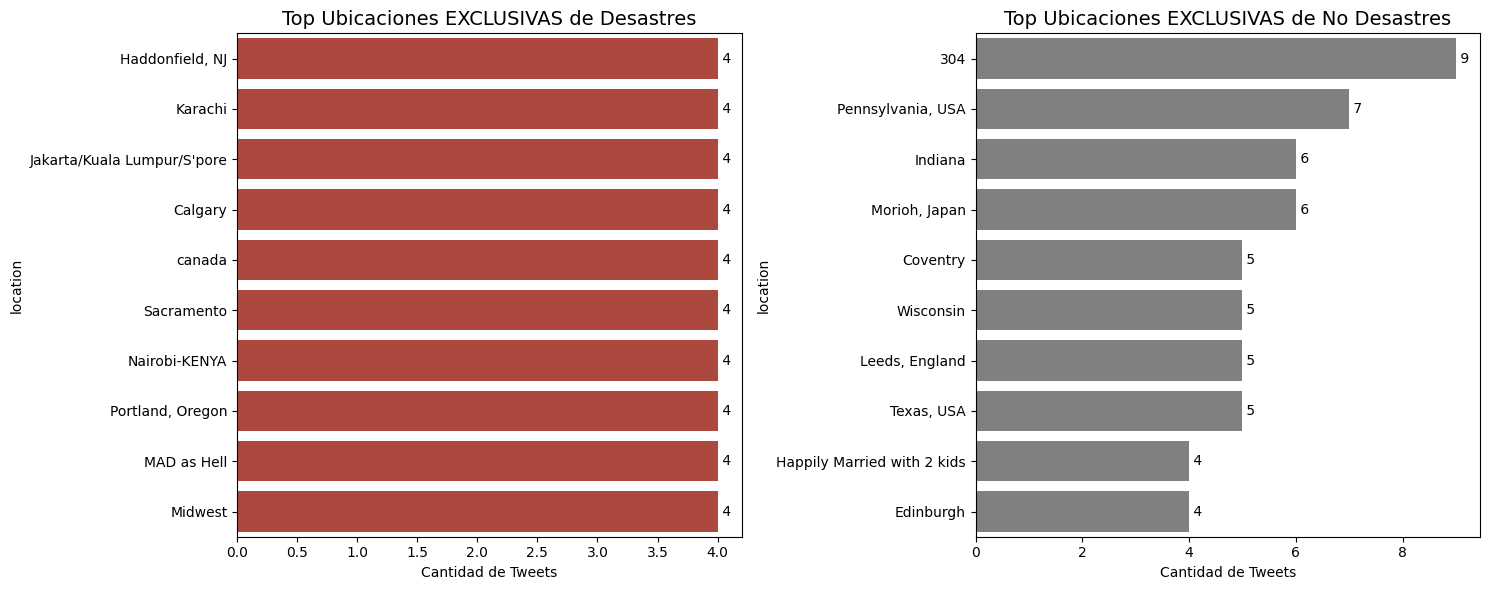

In [22]:
# @title Ubicaciones SOLO de Desastres o Solo de NO Desastres
locations_in_real = set(df_train[(df_train['target'] == 1) & (df_train['location'] != 'no_location')]['location'])
locations_in_fake = set(df_train[(df_train['target'] == 0) & (df_train['location'] != 'no_location')]['location'])

df_exclusive_real = df_train[
    (df_train['target'] == 1) &
    (df_train['location'] != 'no_location') &
    (~df_train['location'].isin(locations_in_fake))
]
df_exclusive_fake = df_train[
    (df_train['target'] == 0) &
    (df_train['location'] != 'no_location') &
    (~df_train['location'].isin(locations_in_real))
]

top_excl_real = df_exclusive_real['location'].value_counts().head(10)
top_excl_fake = df_exclusive_fake['location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_excl_real.values, y=top_excl_real.index, color='#C0392B', ax=axes[0])
axes[0].set_title('Top Ubicaciones EXCLUSIVAS de Desastres', fontsize=14)
axes[0].set_xlabel('Cantidad de Tweets')
for i, v in enumerate(top_excl_real.values):
    axes[0].text(v, i, f' {v}', color='black', va='center')

sns.barplot(x=top_excl_fake.values, y=top_excl_fake.index, color='#808080', ax=axes[1])
axes[1].set_title('Top Ubicaciones EXCLUSIVAS de No Desastres', fontsize=14)
axes[1].set_xlabel('Cantidad de Tweets')
for i, v in enumerate(top_excl_fake.values):
    axes[1].text(v, i, f' {v}', color='black', va='center')

plt.tight_layout()
plt.show()

In [28]:
disaster = df_train[df_train['target'] == 1]
disaster = disaster.dropna(subset=["text"])

not_disaster = df_train[df_train['target'] == 0]
not_disaster = not_disaster.dropna(subset=["text"])


import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

palabras_filtradas_desastre = disaster.apply(lambda row: [palabra for palabra in row['tokens']if palabra.lower() not in stop_words and len(palabra) > 2], axis=1)
palabras_filtradas_no_desastre = not_disaster.apply(lambda row: [palabra for palabra in row['tokens']if palabra.lower() not in stop_words and len(palabra) > 2], axis=1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


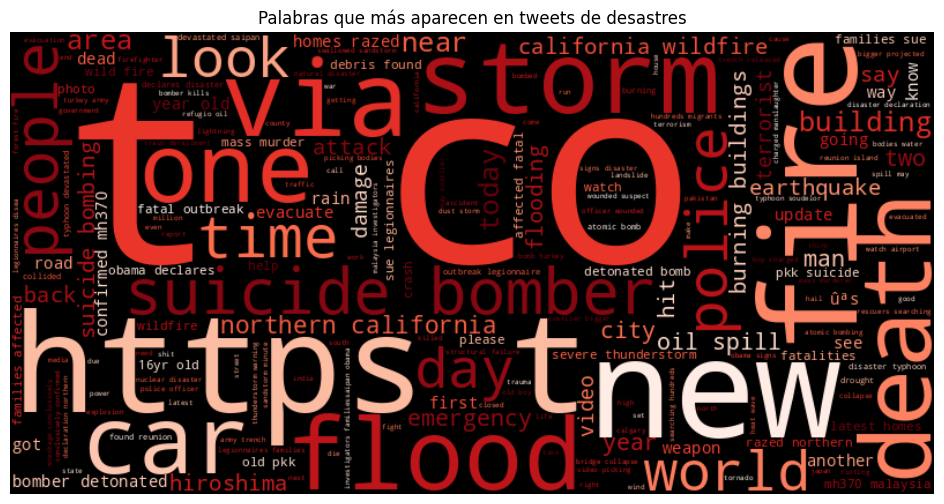

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

texto_unido_desastre = ' '.join([' '.join(palabras) for palabras in palabras_filtradas_desastre])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds',
    max_words=200
).generate(texto_unido_desastre)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Palabras que más aparecen en tweets de desastres')
plt.axis('off')
plt.show()


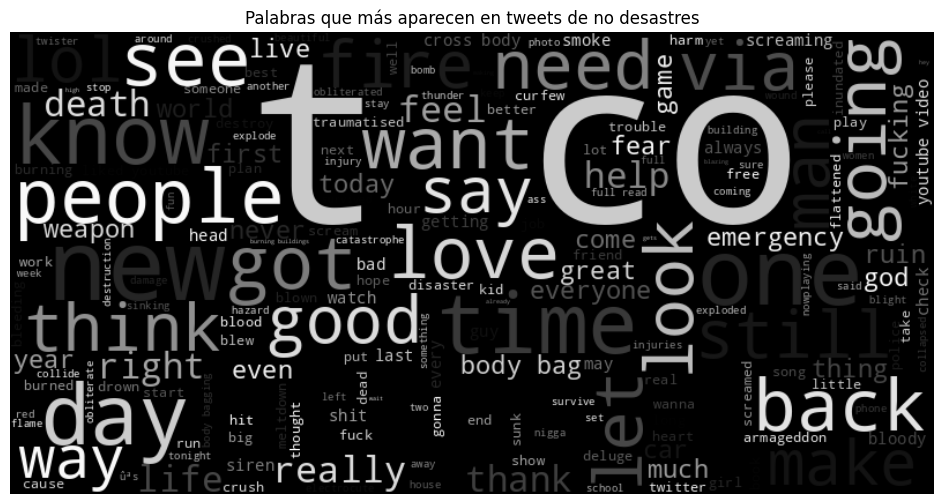

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

texto_unido = ' '.join([' '.join(palabras) for palabras in palabras_filtradas_no_desastre])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Greys',
    max_words=200
).generate(texto_unido)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras que más aparecen en tweets de no desastres')
plt.show()
